### Folium标注北京公园地点及面积

#### 读取公园的地理数据,创建gdf

**geometry = [Point(xy) for xy in zip(df['LON'],df['LAT'])]**

zip(df['LON'], df['LAT'])

- 它的作用是将多个可迭代对象（在这里是经度 Series 和纬度 Series）中对应位置的元素打包成一个个的 元组 (tuple)。

for xy in zip(...)

- 这是列表推导式的循环部分。

- 它会遍历 zip 函数生成的所有元组，每一次循环都会将一个 (经度, 纬度) 的元组赋值给变量 xy。

Point(xy)
- Point() 是一个函数或类的构造函数，它来自于某个用于处理地理空间数据的库（最常见的是 Shapely 或 GeoPandas）。

- 它接收一个坐标元组 xy (例如 (116.3, 39.9))，并利用这个坐标来创建一个几何点对象。

- 这个点对象通常包含了点的坐标信息，并支持各种地理空间操作。

**gdf.set_crs('EPSG:4326', allow_override=True, inplace=True)**

allow_override=True	

这是一个可选参数。如果 GeoDataFrame 已经 有一个 CRS，并且想用新的 CRS 覆盖它（即使它们可能不兼容），就需要将此参数设置为 True。如果您确定坐标值确实是 EPSG:4326 格式，但 GeoDataFrame 错误地标记了另一个 CRS，这个参数就很重要。

inplace=True	

这是一个可选参数。当设置为 True 时，该方法会直接修改原有的 GeoDataFrame (gdf)，而不是返回一个新的 GeoDataFrame 副本。这是一种常见的节省内存的操作。

In [2]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# 读取CSV文件
df = pd.read_csv('parks.csv')

# 创建geometry列，将经纬度转化为Point对象
geometry = [Point(xy) for xy in zip(df['LON'],df['LAT'])]

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(df,geometry = geometry)

# 设置坐标系（CRS），通常会用WGS84（EPSG:4326）
gdf.set_crs('EPSG:4326',allow_override = True,inplace = True)

# 查看结果
gdf.head()

,NAME,LAT,LON,Area,Chinese_Name,Unnamed: 5,Unnamed: 6,geometry
0,Taoranting Park,39.87,116.38,0.57,陶然亭,NaN,NaN,POINT (116.38 39.87)
1,Chaoyang Park,39.94,116.48,2.88,朝阳公园,NaN,NaN,POINT (116.48 39.94)
2,Xiangshan Park,40.00,116.19,1.80,香山,NaN,NaN,POINT (116.19 40)
3,Beijing Tiantan Park,39.99,116.41,1.85,天坛,NaN,NaN,POINT (116.41 39.99)
4,Beihai Park,39.93,116.39,0.70,北海公园,NaN,NaN,POINT (116.39 39.93)


#### Folium - basic - visualization

**m1 = folium.Map(location = [gdf.geometry.y.mean(),gdf.geometry.x.mean()],zoom_start = 12)**

location = [...]：设置地图的初始中心点。

gdf.geometry：访问 GeoDataFrame 中包含几何对象（即 Point 对象）的列。

.y.mean()：计算所有几何点对象 纬度 (y 坐标) 的平均值。

.x.mean()：计算所有几何点对象 经度 (x 坐标) 的平均值。

结果： 地图将以所有数据的平均中心点作为初始中心位置。

在 Python 代码 `for _, row in gdf.iterrows():` 中，下划线 `_` 是一个特殊的占位符，它代表循环中我们**不需要使用的变量**。

---

`_` 的含义和作用

1. `gdf.iterrows()` 的返回值

`gdf.iterrows()` 是 Pandas GeoDataFrame（或 DataFrame）的一个方法，它返回一个迭代器，每次迭代都会生成一对值：

1.  **索引 (Index)**：当前行的标签（例如，行号 0, 1, 2, ...）。
2.  **行数据 (Row Data)**：当前行的所有数据，作为一个 Pandas Series 对象。

所以，在每次循环中，它返回的值结构是 `(index, row_data)`。

2. 解包赋值

在 `for _, row in ...` 中，我们使用了 **元组解包 (Tuple Unpacking)**：

* 第一个位置的返回值（即 **索引**）被赋值给了 `_`。
* 第二个位置的返回值（即 **行数据**）被赋值给了 `row`。

3. 作为占位符

* **约定俗成：** 在 Python 社区中，单下划线 `_` 是一个广泛接受的约定，用来表示一个变量是**故意被忽略的**，或者说，**我们不打算在循环体内部使用它**。
* **本例中：** 代码只需要使用当前行的**数据** (`row`) 来访问几何信息并创建标记。它不需要知道当前数据在原始 GeoDataFrame 中的行索引。因此，为了遵循约定和保持代码简洁，我们将索引值赋给 `_`。

总结

在这个特定的循环中：

| 变量 | 含义 | 用途 |
| :--- | :--- | :--- |
| **`_`** | **行索引** (`index`) | **占位符**，表示该值将被忽略，因为在循环体中不需要用到它。 |
| **`row`** | **行数据** (`row_data`) | 用于在循环体中访问点坐标 (`row.geometry.x`, `row.geometry.y`)。 |

使用 `_` 使得代码的意图更加清晰：告诉读者“我们只关心行内容，不关心行索引”。

In [3]:
import folium

# 创建一个基础地图，通常选择某个中心点和缩放级别
m1 = folium.Map(location = [gdf.geometry.y.mean(),gdf.geometry.x.mean()],
               zoom_start = 12)

# 将GeoDataFrame中的每个点添加到地图
for _,row in gdf.iterrows():
    folium.Marker(location = [row.geometry.y,row.geometry.x]).add_to(m1)

# 显示并保存地图
m1.save('m1.html')
m1

#### Folium - 根据area值绘制圆

In [4]:
import folium

m2 = folium.Map(location = [gdf.geometry.y.mean(),gdf.geometry.x.mean()],zoom_start = 12,tiles = 'cartodbpositron')

# 根据area值绘制圆
for _,row in gdf.iterrows():
    area_value = row['Area']
    ratio = 5.0
    radius = area_value * ratio # 根据area值动态设置圆的半径，可以根据实际情况调整比例因子

    folium.CircleMarker(location = [row.geometry.y,row.geometry.x],
                        radius = radius,
                        color = 'red',
                        fill = True,
                        fill_color = 'red',
                        fill_opacity = 0.6,
                        pop_up = f'Area:{area_value}').add_to(m2)

# 显示并保存地图
m2.save('m2.html')
m2

### 情感得分

#### 中文情感分析函数

In [6]:
import torch
from transformers import BertTokenizer,BertForSequenceClassification

def SentimentalAnalysis(comments):

    # 加载预训练的中文 BERT 模型和分词器
    tokenizer = BertTokenizer.from_pretrained('uer/roberta-base-finetuned-jd-binary-chinese')
    model = BertForSequenceClassification.from_pretrained('uer/roberta-base-finetuned-jd-binary-chinese')

    # 设定模型为评估模式
    model.eval()
    # 将模型设置为评估 (evaluation) 模式。这会关闭训练时特有的层（如 Dropout 和 Batch Normalization 的更新），确保推理结果的稳定性和一致性。
    # 在进行预测时，这是必须的操作。

    # 处理每条评论并进行推理
    scores = []
    for comment in comments:
        inputs = tokenizer(comment,
                           return_tensors = 'pt',
                           truncation = True,
                           padding = True,
                           max_length = 512)
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits 
            # 从模型输出中提取原始预测得分 (Logits)。在二分类中，这是一个包含两个值的张量：[负面得分, 正面得分]
            prob = torch.nn.functional.softmax(logits,dim = -1) 
            # 使用 Softmax 函数将原始 Logits 转换为概率 (Probability)。Softmax 确保概率值在 0 到 1 之间，且它们的总和为 1
            scores.append(prob[0][1].item()) # 取正面情绪的概率
  
    positive = []
    negative = []
    for score in scores:
        if score > 0.5:
            positive.append(score)
        else:
            negative.append(score)
    print(scores)

    # 计算整体情感得分（0-1 之间，越高越正面）
    average_score = sum(scores)/len(scores)

    print(f'整体情感得分:{average_score:.2f}')
    return average_score

#### 批量处理不同地点（公园）评论数据，并计算它们各自情感得分

In [11]:
# 数据加载和初始化
park_list = ['玉渊潭','天坛','香山','陶然亭','朝阳公园','颐和园','北海公园']

data = pd.read_excel('weibo_data1.xlsx')

# 主循环：按公园筛选和分析
scores = {}
for park in park_list:
    comments = []
    parkdata = data[data['关键词'] == park] # 查找该名称的公园并汇总

    # 提取评论文本
    for i in range(1,len(parkdata)):
        comments.append(parkdata.iloc[i,3])
    
    score = SentimentalAnalysis(comments)
    scores[park] = score # 将计算出的平均情感得分 score 存储到 scores 字典中，使用公园名称 park 作为键。

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
'(ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')), '(Request ID: e46d9a03-09ed-43fc-a3d6-607a6df38deb)')' thrown while requesting HEAD https://huggingface.co/uer/roberta-base-finetuned-jd-binary-chinese/resolve/main/vocab.txt
Retrying in 1s [Retry 1/5].
'(ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')), '(Request ID: ec31f4bd-7b9a-4ff9-b3ee-c807f7543813)')' thrown while requesting HEAD https://huggingface.co/uer/roberta-base-finetuned-jd-binary-chinese/resolve/main/vocab.txt
Retrying in 2s [Retry 2/5].
'(ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')), '(Request ID: c8

[0.9898374676704407, 0.9881321787834167, 0.8378551006317139, 0.9883840084075928, 0.8453292846679688, 0.9852806925773621, 0.8018884658813477, 0.9186290502548218, 0.9459065794944763, 0.9446008205413818, 0.9892674088478088, 0.9667942523956299, 0.9850601553916931, 0.820176362991333, 0.9783345460891724, 0.7701506018638611, 0.9147530794143677, 0.7186527848243713, 0.9884955883026123, 0.8359801173210144, 0.8795062303543091, 0.9913424253463745, 0.07530525326728821, 0.921644389629364, 0.9887203574180603, 0.9175822138786316, 0.7445415258407593, 0.7209236025810242, 0.9914656281471252, 0.8591309785842896, 0.9936591982841492, 0.9473074078559875, 0.9560231566429138, 0.9880195260047913, 0.9658116102218628, 0.9872244596481323, 0.9908568263053894, 0.8893257975578308, 0.7901157140731812, 0.7631068825721741, 0.991734504699707, 0.8129430413246155, 0.8731178641319275, 0.949670672416687, 0.9885650277137756, 0.6653992533683777, 0.8444636464118958, 0.9701365828514099, 0.6039734482765198, 0.822157621383667, 0.3

In [12]:
scores

{'玉渊潭': 0.8489055606407045,
 '天坛': 0.7969470372241655,
 '香山': 0.8071794911479273,
 '陶然亭': 0.8205422734525176,
 '朝阳公园': 0.7908796312819634,
 '颐和园': 0.847240391358166,
 '北海公园': 0.8243872723323387}

#### 将打分加入gdf表格

In [13]:
gdf

,NAME,LAT,LON,Area,Chinese_Name,Unnamed: 5,Unnamed: 6,geometry
0,Taoranting Park,39.87,116.38,0.57,陶然亭,NaN,NaN,POINT (116.38 39.87)
1,Chaoyang Park,39.94,116.48,2.88,朝阳公园,NaN,NaN,POINT (116.48 39.94)
2,Xiangshan Park,40.00,116.19,1.80,香山,NaN,NaN,POINT (116.19 40)
3,Beijing Tiantan Park,39.99,116.41,1.85,天坛,NaN,NaN,POINT (116.41 39.99)
4,Beihai Park,39.93,116.39,0.70,北海公园,NaN,NaN,POINT (116.39 39.93)
5,Yuyuantan Park,39.91,116.32,1.37,玉渊潭,NaN,NaN,POINT (116.32 39.91)
6,The Old Summer Palace,40.01,116.30,1.40,颐和园,NaN,NaN,POINT (116.3 40.01)


In [16]:
for park in park_list:
     gdf.loc[gdf['Chinese_Name'] == park, 'senti_score'] = scores[park]
gdf

,NAME,LAT,LON,Area,Chinese_Name,Unnamed: 5,Unnamed: 6,geometry,senti_score
0,Taoranting Park,39.87,116.38,0.57,陶然亭,NaN,NaN,POINT (116.38 39.87),0.820542
1,Chaoyang Park,39.94,116.48,2.88,朝阳公园,NaN,NaN,POINT (116.48 39.94),0.790880
2,Xiangshan Park,40.00,116.19,1.80,香山,NaN,NaN,POINT (116.19 40),0.807179
3,Beijing Tiantan Park,39.99,116.41,1.85,天坛,NaN,NaN,POINT (116.41 39.99),0.796947
4,Beihai Park,39.93,116.39,0.70,北海公园,NaN,NaN,POINT (116.39 39.93),0.824387
5,Yuyuantan Park,39.91,116.32,1.37,玉渊潭,NaN,NaN,POINT (116.32 39.91),0.848906
6,The Old Summer Palace,40.01,116.30,1.40,颐和园,NaN,NaN,POINT (116.3 40.01),0.847240


#### folium - 根据情绪打分绘制圆的大小

In [18]:
import folium
m3 = folium.Map(location = [gdf.geometry.y.mean(),gdf.geometry.x.mean()],
                zoom_start = 12,
                tiles = 'cartodbpositron')

# 根据情绪打分绘制圆的大小
for _,row in gdf.iterrows():
    senti_value = row['senti_score']
    ratio = 30
    radius = ratio * senti_value

    folium.CircleMarker(location = [row.geometry.y,row.geometry.x],
                        radius = radius,
                        color = 'red',
                        fill = True,
                        fill_color = 'red',
                        fill_opacity = 0.6,
                        popup = f'{senti_value:.2f}').add_to(m3)

# 显示并保存地图
m3.save('m3.html')
m3

#### folium - # 根据 senti_score 动态设置圆的半径和颜色

In [23]:
import folium
from folium import plugins
from branca.colormap import linear # 导入 branca 库中的线性颜色映射模块。branca 是 Folium 的底层依赖，用于创建颜色条等辅助元素。

m4 = folium.Map(location = [gdf.geometry.y.mean(),gdf.geometry.x.mean()],
               zoom_start = 12,
               tiles = 'cartodbpositron')

# 创建颜色映射
colormap = linear.YlGnBu_09.scale(gdf['senti_score'].min(),gdf['senti_score'].max())
# 添加颜色条
colormap.add_to(m4)

# 比例因子,控制圆的大小
ratio = 50

# 根据 senti_score 绘制圆并设置颜色
for _,row in gdf.iterrows():
    senti_value = row['senti_score']
    radius = senti_value * ratio # 根据 senti_score 动态设置圆的半径

    folium.CircleMarker(
        location = [row.geometry.y,row.geometry.x],
        radius = radius,
        color = colormap(senti_value), # 获取对应 senti_score 的颜色
        fill = True,
        fill_color = colormap(senti_value),
        fill_opacity = 0.6,
        popup = f'senti_score : {senti_value:.2f}'
    ).add_to(m4)

m4.save('m4.html')
m4

### 文本处理

#### 文本预处理

In [24]:
import pandas as pd
import jieba
import re

def match_chinese(text):
    chinese_pattern = r'[\u4e00-\u9fa5]+' # \u4e00-\u9fa5 用于表示Unicode中常见汉字的范围
    chinese_text = re.findall(chinese_pattern,text)
    return chinese_text

def processWords(sentence):
    sentence_list = match_chinese(sentence)
    # list -> string
    sentence = ''
    for sentence_l in sentence_list:
        sentence += sentence_l
    return sentence

def segDepart(sentence):
    sentence_depart = jieba.lcut(str(sentence).strip())
    return sentence_depart

def getStopwordsList():
    stopwords = [line.strip() for line in open('cn_stopwords.txt',encoding = 'UTF-8').readlines()]
    return stopwords

def getStopwordsWeiboList():
    stopwords = [line.strip() for line in open('weibo_stopwords.txt',encoding = 'UTF-8').readlines()]
    return stopwords

def moveStopwords(sentence_list,stopwords_list):
    out_list = [word for word in sentence_list if word not in stopwords_list]
    return out_list

def LoadData(filepath):

    data = pd.read_excel(filepath)

    text = []
    stop_list = getStopwordsList()
    for i in range(len(data)):
        str_row = data.iloc[i,3]
        str_row = processWords(str_row)
        str_row = segDepart(str_row)
        line_without = moveStopwords(str_row, stop_list)
        stop_listWeibo = getStopwordsWeiboList()
        line_without = moveStopwords(line_without, stop_listWeibo)

        lineStr = ' '.join(line_without)
        text.append(lineStr)

    return text

#### K-Means 聚类的肘部法则 (Elbow Method) 分析
肘部法则是一种常用的启发式方法，用于帮助用户选择 K-Means 算法中的最佳聚类数量 $K$。

TestKmeans 函数的核心目标是计算不同 $K$ 值（聚类数量）下的 平方误差和 (SSE)，并绘制图表来寻找最佳 $K$ 值。

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter

def TestKmeans(filepath,n_clusters,max_df = 0.5,min_df = 2,max_iter = 100,n_init = 20):

    # 加载数据
    data = LoadData(filepath) # return text

    # 获得tf-idf向量 : TF-IDF 矩阵通常维度非常高（可能数万维），高维数据计算代价大，且容易受到维度灾难的影响，影响聚类效果
    vectorizer_tfidf = TfidfVectorizer(max_df = max_df,
                                       min_df = min_df,
                                       use_idf = True)
    X_tfidf = vectorizer_tfidf.fit_transform(data)

    # 使用 svd 进行降维
    svd = TruncatedSVD(100) # 降维到100
    # TruncatedSVD: 这是降维的核心工具。它基于奇异值分解 (Singular Value Decomposition, SVD)，但只计算前 $k$ 个最大的奇异值和对应的向量。
    normalizer = Normalizer(copy = False)
    # Normalizer: 这是一个预处理步骤，它对降维后的向量进行 L2 范数归一化（即，将每个向量的长度缩放到 1）。
    # copy=False: 表示原地操作，不创建新的数据副本，以节省内存。
    # 作用: 归一化后的向量具有相同的长度，这对于后续的 K-Means 聚类至关重要。因为 K-Means 默认使用欧氏距离，距离计算会受到向量长度的影响。规范化可以确保聚类过程只关注向量的方向（即文档在潜在主题空间中的角度或相对位置），而不是其绝对长度。
    lsa = make_pipeline(svd,normalizer)
    # make_pipeline: 将 SVD 降维和 Normalizer 规范化这两个步骤串联起来。
    # lsa: 这个管道对象现在代表了完整的 潜在语义分析 (LSA) 流程
    X_tfidf_lsa = lsa.fit_transform(X_tfidf)

    # 应用聚类
    # k-means++ ：初始化聚类中心的方法。是一种智能初始化方法，它通过选择一个远离已选择中心点的数据点作为新的中心来减少聚类收敛时的随机性。
    # max_iter 指定 KMeans 算法的最大迭代次数。即在没有收敛时，算法最多允许多少次更新聚类中心的位置。过小的 max_iter 可能导致算法没有完全收敛，过大的 max_iter 可能导致计算时间过长。
    # n_init: 指定算法运行的次数。每次运行都会随机初始化聚类中心，KMeans 会选择最佳的结果。多次运行有助于避免由于初始聚类中心选择不佳而导致的局部最优解。
    # 在现代 Scikit-learn 版本中，推荐使用默认值（通常为 10）或更高的值（如 $n_{init}=20$）来运行 K-Means，以确保模型能找到更稳定、更接近全局最优的聚类结果，使 SSE 曲线更平滑和可靠。
    # verbose: 控制是否输出详细信息。设置为 True 时，算法运行过程中会输出每次迭代的信息；设置为 False 时，禁止输出信息。

    # 使用肘部法则选择K值 : 通常可以使用“肘部法则”（Elbow Method）来选择K值，即绘制不同K值下的误差平方和（SSE），然后选择误差下降速度明显减缓的K值。
    SSE = []
    for k in range(1,n_clusters):
        km = KMeans(n_clusters = k,
                    init = 'k-means++',
                    max_iter = max_iter, # max_iter = 100 指定 KMeans 算法的最大迭代次数
                    n_init = n_init, # n_init = 10 or 20 指定算法运行的次数。
                    verbose = False)
        km_X_tfidf_lsa = km.fit(X_tfidf_lsa)
        SSE.append(km.inertia_) # inertia_计算了所有到各自簇中心的欧几里得距离的平方和
    print(SSE)

    # 绘制肘部法则图
    plt.plot(range(1,n_clusters),SSE)
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.title('Elbow Method for Optimal K')
    plt.show()

根据肘部法则，我们应该寻找图上**斜率开始急剧变缓**的点，该点被称为“肘部”。在这个点之后，继续增加 $K$ 值所带来的 **SSE（平方误差和）** 的减小幅度变得不那么显著。

图表分析

1.  **从 $K=1$ 到 $K=2$**：SSE 下降非常快（从约 77 到 72）。
2.  **从 $K=2$ 到 $K=3$**：SSE 继续以较快的速度下降（从约 72 到 68）。
3.  **从 $K=3$ 到 $K=4$**：SSE 下降速度开始变缓（从约 68 到 65）。
4.  **从 $K=4$ 开始**：曲线变得相对平坦，下降趋势明显减弱。

最佳 K 值建议

基于这个趋势，**$K=4$** 是最合理的选择，因为它位于曲线的“肘部”位置。 
* 选择 $K=4$ 意味着您在**聚类数量**（模型复杂度）和**聚类紧凑度**（SSE，误差）之间找到了一个较好的平衡点。
* 如果继续选择 $K=5$ 或 $K=6$，虽然 SSE 仍然会减小，但带来的改进效益已经不如前几步显著，这可能导致模型**过度拟合**或引入不必要的复杂性。

因此，**建议的 $K$ 值为 4**。可以使用 $K=4$ 运行您的 `getKmeans` 函数。

[77.35968113706411, 71.47572770964445, 68.03132708757533, 65.06517758584857, 64.28220104523335, 62.32300495399766]


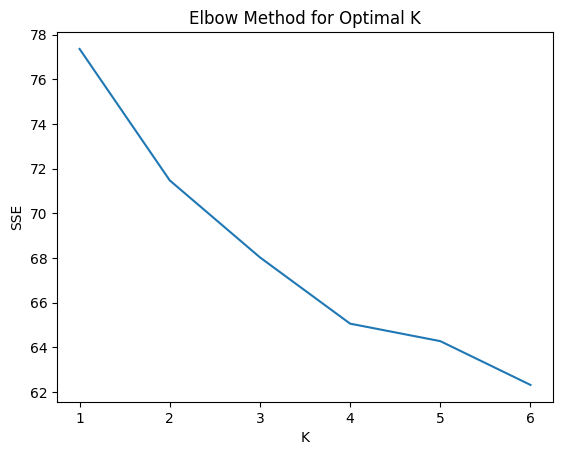

In [38]:
TestKmeans('weibo_data.xlsx',7)

#### 文本聚类分析

对文本数据执行 K-Means 聚类 (Clustering)，并通过 降维 (Dimensionality Reduction) 和 TF-IDF 特征提取 优化聚类效果，并最终以饼图形式可视化聚类结果的代码。

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter
import matplotlib.cm as cm

def getKmeans(filepath, name, n_clusters=4, max_df=0.5, min_df=2, max_iter=100, n_init=20):

    # 加载数据
    data = LoadData(filepath) # return text

    # 获得tf-idf向量 : TF-IDF 矩阵通常维度非常高（可能数万维），高维数据计算代价大，且容易受到维度灾难的影响，影响聚类效果
    vectorizer_tfidf = TfidfVectorizer(max_df = max_df,
                                       min_df = min_df,
                                       use_idf = True)
    X_tfidf = vectorizer_tfidf.fit_transform(data)

    # 使用 svd 进行降维
    svd = TruncatedSVD(100) # 降维到100
    # TruncatedSVD: 这是降维的核心工具。它基于奇异值分解 (Singular Value Decomposition, SVD)，但只计算前 $k$ 个最大的奇异值和对应的向量。
    normalizer = Normalizer(copy = False)
    # Normalizer: 这是一个预处理步骤，它对降维后的向量进行 L2 范数归一化（即，将每个向量的长度缩放到 1）。
    # copy=False: 表示原地操作，不创建新的数据副本，以节省内存。
    # 作用: 归一化后的向量具有相同的长度，这对于后续的 K-Means 聚类至关重要。因为 K-Means 默认使用欧氏距离，距离计算会受到向量长度的影响。规范化可以确保聚类过程只关注向量的方向（即文档在潜在主题空间中的角度或相对位置），而不是其绝对长度。
    lsa = make_pipeline(svd,normalizer)
    # make_pipeline: 将 SVD 降维和 Normalizer 规范化这两个步骤串联起来。
    # lsa: 这个管道对象现在代表了完整的 潜在语义分析 (LSA) 流程
    X_tfidf_lsa = lsa.fit_transform(X_tfidf)

    # 应用聚类
    # k-means++ ：初始化聚类中心的方法。是一种智能初始化方法，它通过选择一个远离已选择中心点的数据点作为新的中心来减少聚类收敛时的随机性。
    # max_iter 指定 KMeans 算法的最大迭代次数。即在没有收敛时，算法最多允许多少次更新聚类中心的位置。过小的 max_iter 可能导致算法没有完全收敛，过大的 max_iter 可能导致计算时间过长。
    # n_init: 指定算法运行的次数。每次运行都会随机初始化聚类中心，KMeans 会选择最佳的结果。多次运行有助于避免由于初始聚类中心选择不佳而导致的局部最优解。
    # verbose: 控制是否输出详细信息。设置为 True 时，算法运行过程中会输出每次迭代的信息；设置为 False 时，禁止输出信息。
    # 在 KMeans 上：对数据使用 km.fit(X_tfidf_lsa) 进行训练，然后使用 km.predict(X_tfidf_lsa) 进行预测（本质上相当于 transform）
    km = KMeans(n_clusters = n_clusters,
                init = 'k-means++',
                max_iter = max_iter,
                n_init = n_init,
                verbose = False)
    km_X_tfidf_lsa = km.fit(X_tfidf_lsa)

    # 预测聚类
    labels = km.predict(X_tfidf_lsa)

    # 统计聚类和每个对应的数目
    clusters = [[] for _ in range(n_clusters)]
    for idx,label in enumerate(labels):
        clusters[label].append(idx)

    cluster_items = [len(cluster) for cluster in clusters]

    print("Cluster sizes:", cluster_items)
    
    # 将聚类中心从降维后的空间映射回原始的TF-IDF特征空间
    original_space_centroids = svd.inverse_transform(km_X_tfidf_lsa.cluster_centers_)
    
    # 聚类中心中的每个元素按值排序。这里排序的是聚类中心向量中每个词的权重（重要性）
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    # .argsort()作用: 这是 NumPy 数组的一个方法，用于返回数组值从小到大排序后的索引。
    # [:, ::-1] 这是一个 NumPy 的 切片 (Slicing) 操作，用于对上一步得到的索引矩阵进行反转。
    # :: 表示选择所有的行（即所有的聚类中心）。
    # ::-1: 表示选择所有的列，但步长为 -1，即从后往前取。
    # 作用: 它将 .argsort() 返回的升序索引列表（从小到大）反转为降序索引列表（从大到小）。

    # 获取TF-IDF特征矩阵中每一列对应的词汇，即构建模型时所用的所有词汇。
    terms = vectorizer_tfidf.get_feature_names_out()

    # 统计所有聚类中心的前3个关键词
    tips = []
    for i in range(n_clusters):
        tip = ' '.join(terms[ind] for ind in order_centroids[i,:3])
        tips.append(tip)
    # order_centroids[i, :3]:
    # i: 选取当前聚类 $i$ 对应的行。
    # :3: 选取该行的前三个元素。
    # 由于 order_centroids 已经将词语索引按照权重（重要性）从高到低排列，因此这里的 :3 提取的就是当前聚类中 Top 3 关键词的原始词汇表索引。

    # 打印各聚类中心的前三关键词
    print("Top terms per cluster:")
    for i,tip in enumerate(tips):
        print(f'Cluster {i} : {tip}')
    
    # 关键词频率统计
    term_counts = Counter() # 初始化 term_counts
    # Counter 是 Python 标准库 collections 模块中的一个非常实用的类，专门用于计数可哈希对象（如字符串、数字等）出现的频率。
    # 可以把它理解为一个特殊的字典 (dictionary)，其中：
    # 键 (Key) 是被计数的元素（例如，一个词语）。
    # 值 (Value) 是该元素出现的次数（即频率）。

    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i,:3]]
        term_counts.update(top_terms)
        # .update(top_terms): 这是 Counter 对象的关键方法。它将 top_terms 列表中的所有词语添加到 term_counts 中：
        # 如果词语是第一次出现，它将被添加为键，并将值设为 1。
        # 如果词语已经存在（即它在之前的聚类中也被列为 Top 3 关键词），它的计数值将 +1。
    print(term_counts)

    # 打印出现次数
    for term,count in term_counts.most_common():
        print(f'{term} : {count}')

    # 饼图可视化
    # 指定 SimHei 字体路径（替换成你的实际路径）
    font_path = 'SIMHEI.TTF'
    
    # 定义颜色列表，使用 Matplotlib 内置的 Colormap
    # Set1 是一种常用的分类色板，(n_clusters) 决定了从色板中取多少种颜色
    colors = cm.Set2(range(n_clusters))

    # 应用到 Matplotlib
    my_font = fm.FontProperties(fname=font_path)
    plt.rcParams['axes.unicode_minus'] = False  # 避免负号显示错误
    
    # 绘制饼状图
    plt.figure(figsize=(8, 6))  # 设置图表大小
    plt.pie(
        cluster_items,
        labels=tips,  # 设置饼图标签
        autopct="(%1.1f%%)",  # 饼块内标签
        textprops={"fontproperties": my_font},  # 设置字体
    )

    plt.title(f"{name} 聚类饼状图", fontproperties=my_font)  # 指定字体

    # **先保存再显示**
    save_path = f"{name} 聚类分析饼状图.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")  # 高分辨率保存
    plt.show()  # 显示图像

Cluster sizes: [10, 9, 85, 2]
Top terms per cluster:
Cluster 0 : 樱花 室内 表演
Cluster 1 : 腊梅 蜡梅 迎春
Cluster 2 : 樱花 傍晚 年初
Cluster 3 : 反噬 事实 威胁
Counter({'樱花': 2, '室内': 1, '表演': 1, '腊梅': 1, '蜡梅': 1, '迎春': 1, '傍晚': 1, '年初': 1, '反噬': 1, '事实': 1, '威胁': 1})
樱花 : 2
室内 : 1
表演 : 1
腊梅 : 1
蜡梅 : 1
迎春 : 1
傍晚 : 1
年初 : 1
反噬 : 1
事实 : 1
威胁 : 1


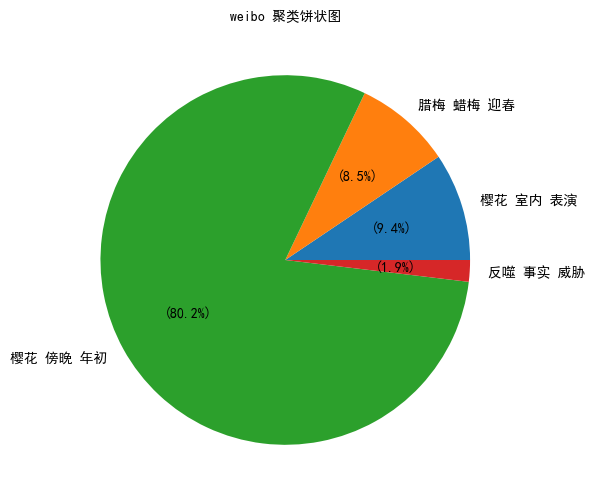

In [49]:
getKmeans('weibo_data.xlsx','weibo',n_clusters=4)

#### 文本处理——小红书

In [50]:
def ProcessData(filepath,index):
    '''
    :param filepath:
    :return:
    '''
    data = pd.read_excel(filepath)
    
    text = []
    stop_list = getStopwordsList()
    for i in range(len(data)):
        
        str_row = data.iloc[i, index]
        # 移除不合适的字符
        str_row = processWords(str_row)
        # 分词
        str_row = segDepart(str_row)
        # 移除停用词
        line_without = moveStopwords(str_row, stop_list)
        
        # 移除特定的停用词
        stop_listWeibo = getStopwordsWeiboList()
        line_without = moveStopwords(line_without, stop_listWeibo)
        text.append(line_without)
        
        
    return text

In [51]:
data = ProcessData("redbook_data.xlsx",2)
data

[['近些年',
  '前往',
  '观鸟',
  '越来越',
  '不乏',
  '刚刚',
  '踏入',
  '观鸟',
  '世界',
  '新手',
  '更好',
  '欣赏',
  '可爱',
  '生命',
  '精心制作',
  '这份',
  '最新',
  '观鸟',
  '图鉴',
  '几点',
  '解释一下',
  '遇见',
  '概率',
  '阿婆',
  '主',
  '数据',
  '个人',
  '经验',
  '悉心',
  '整理',
  '尽力',
  '做到',
  '相对',
  '准确',
  '疏漏',
  '欢迎',
  '评论',
  '区',
  '留言',
  '探讨',
  '交流',
  '不断进步',
  '春夏秋冬',
  '鸟儿',
  '迁徙',
  '路线',
  '随之',
  '变化',
  '同一个',
  '公园',
  '鸟种',
  '有所不同',
  '保证',
  '图鉴',
  '任何时刻',
  '时效性',
  '定期',
  '更新',
  '图鉴',
  '观鸟',
  '旅',
  '同步',
  '成长',
  '制作',
  '图鉴',
  '过程',
  '中',
  '整理',
  '资料',
  '比较',
  '耗时',
  '选取',
  '代表性',
  '鸟种',
  '进入',
  '图鉴',
  '新',
  '鸟种',
  '图鉴',
  '中',
  '错误',
  '欢迎',
  '留言',
  '完善',
  '图鉴',
  '图鉴',
  '初衷',
  '希望',
  '降低',
  '观鸟',
  '门槛',
  '鼓励',
  '更',
  '关注',
  '鸟类',
  '热爱生活',
  '切记',
  '重要',
  '文明',
  '观鸟',
  '观鸟',
  '旅',
  '充满',
  '爱',
  '尊重',
  '观鸟',
  '观鸟',
  '自然',
  '教育观',
  '鸟',
  '入门',
  '身边',
  '鸟',
  '认识',
  '鸟',
  '鸟鸟',
  '观鸟',
  '手册',
  '小学',
  '科学',
  '周末',
  '公园',
  '公园',
  '拍照',


### Word2Vec 模型进行词向量 (Word Embeddings) 训练

对于中文文档，可以选择中文预训练的 Word2Vec 模型，或者自己训练一个 Word2Vec 模型。如果你选择自己训练模型，首先需要处理中文文本，进行分词、去停用词等操作。以下是两种选择的具体方法：

1. 使用预训练的中文 Word2Vec 模型
	对于中文，许多资源提供了预训练的 Word2Vec 模型。以下是一些常用的中文预训练模型来源：
	- Tencent AI Lab: 腾讯的 AI 实验室发布了一个中文 Word2Vec 模型，涵盖大量中文词汇，适合一般用途。
	- Chinese Word Vectors: 一些开源的中文模型，如 Chinese Word Vectors，包含大量的中文语料训练的词向量。

2. 自己训练
	words = [ ]
	model = Word2Vec(sentences=[words], vector_size=100, window=5, min_count=1, workers=4)
	参数解释：
	- sentence本身就是一个二维列表
	- vector_size: 词向量的维度。一般是100-300 
	- window: 上下文窗口大小，决定了每个词被周围多少个词影响。
	- min_count: 最小词频，表示低于此频率的词会被忽略。
	- workers: 线程数，用于加速训练。
	
	**位置关系表示语义**：词向量的不同维度值共同表示了一个词的特征。在同一个词向量空间中，语义相似的词语会更靠近。

Word2Vec 的核心在于将离散的词语转化成连续、稠密的向量表示。这种表示方式能够捕获词语的语义信息和上下文关系，极大地提高了自然语言处理模型处理文本数据的能力。

In [53]:
from gensim.models import Word2Vec

# 1. 训练 Word2Vec 模型
# 初始化模型

model = Word2Vec(vector_size = 100,
                 window = 5,
                 min_count = 5,
                 workers = 4)

# Word2Vec 在 Gensim 中通常分两步训练
# a. 先构建词汇表
model.build_vocab(data)
# 模型遍历输入数据 data（一个由句子/评论组成的列表，每个句子/评论又是由词语组成的列表），统计词频，并根据 min_count 等参数确定最终的词汇表。

# b. 然后开始训练模型
model.train(data,
            total_examples = model.corpus_count, # 告诉模型语料库中总共有多少个句子（或文档）。这是训练进度和性能优化的参数。
            epochs = model.epochs) # 设置模型在整个语料库上训练的迭代次数（通常默认为 5）。

# 2. 获取词向量
word_vectors = model.wv['樱花'] # 获取"玉渊潭"的词向量
# model.wv: 访问训练好的模型的词向量 (Word Vectors) 实例。词向量存储了模型的全部词向量结果。
# model.wv['樱花']: 通过键控方式，获取词语 "樱花" 对应的 100 维向量（即一个 NumPy 数组）。

# 3. 查询相似词
similar_words = model.wv.most_similar('樱花',topn = 10)
# model.wv.most_similar('樱花', topn=10): 使用训练好的模型查询与词语 "樱花" 语义最相似的 10 个词语。
# 相似性原理: 模型通过计算词语向量之间的余弦相似度来判断相似性。在向量空间中，两个词语的向量方向越接近，它们在语义上就越相似。
# 结果: similar_words 返回一个包含 10 个元组的列表，每个元组包含 (相似词, 相似度分数)。

print(similar_words)

[('公园', 0.99244624376297), ('种草', 0.9906111359596252), ('拍', 0.9903450608253479), ('西门', 0.9899786114692688), ('开放', 0.9897839426994324), ('冰场', 0.988998293876648), ('拍照', 0.9888810515403748), ('项目', 0.9887582063674927), ('鸭', 0.988572895526886), ('冰雪', 0.9884844422340393)]


### t-SNE 降维技术

t-SNE（t-Distributed Stochastic Neighbor Embedding） 是一种用于数据降维的非线性算法，主要用于高维数据可视化。它将高维数据映射到二维或三维空间中，同时尽量保持数据中点之间的相似性。

工作原理

t-SNE 的目标是将 高维空间 中的 相似数据点 映射到 低维空间，并保持它们之间的 相似性。

算法的核心思想是：
- 相似度度量：通过高斯分布度量高维空间中每一对数据点之间的相似度（这会产生一个概率分布）。
- 概率分布：高维空间中，数据点的相似性会被转换为概率，相似的点具有较高的概率，而不相似的点则具有较低的概率。
- 低维映射：在低维空间中，t-SNE 试图通过最小化高维空间和低维空间中相似度的差异（通过 Kullback-Leibler 散度来度量）来找到最佳的低维表示。
- 效果显著：t-SNE 特别适用于文本数据、图像数据、基因表达数据等高维数据的可视化。

** **通常 t-SNE 会将相似的点在二维或三维空间中聚集在一起，不相似的点分开显示，从而帮助我们理解数据的分布**。

这段代码使用 **t-SNE 降维技术**，将 Word2Vec 模型训练出的高维词向量（本例中为五个与“花”和“拍照”相关的词语）映射到二维平面上，并通过**散点图**和**标签**进行可视化，以便直观展示词语间的**语义相似度**。

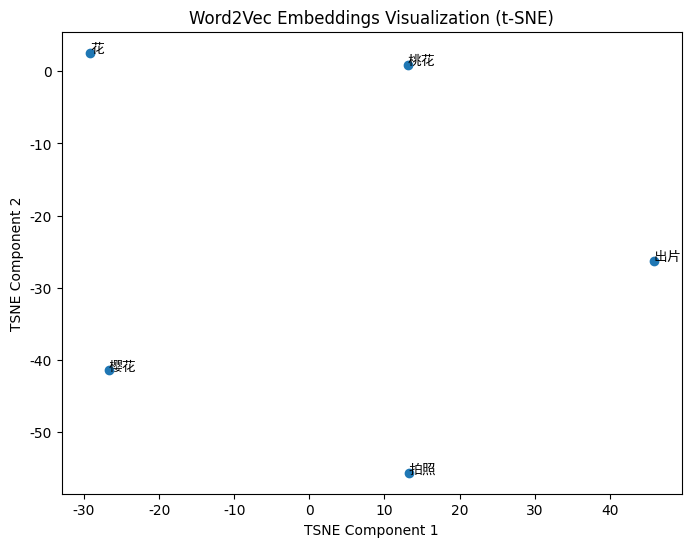

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm

# 选择要可视化的单词
words = ["樱花","桃花","花","出片","拍照"]
word_vectors = np.array([model.wv[word] for word in words])
# model.wv[word]: 假设 model 是之前训练好的 Word2Vec 模型，model.wv 访问其词向量空间。代码通过列表推导式获取这五个词语各自的 100 维词向量（假设 vector_size=100）。
# word_vectors: 最终是一个 NumPy 数组，维度为 (5, 100)，即 5 个词，每个词有 100 个特征。

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, perplexity=min(5, len(word_vectors)-1), random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)
# t-SNE (t-distributed Stochastic Neighbor Embedding): 是一种强大的非线性降维技术，特别适用于高维数据的可视化。它的目标是保留高维空间中数据点之间的局部结构（即相似的点在降维后仍保持接近）。
# n_components=2: 指定降维后的目标维度为 2 维，以便在平面图上绘制。
# perplexity: t-SNE 的关键参数，可以粗略理解为每个点周围的有效邻居数量。它影响降维后局部和全局结构之间的平衡。这里的设置确保了 perplexity 的值不超过数据点总数减 1。
# random_state=42: 设置随机种子，确保每次运行降维结果一致。
# word_vectors_2d: 降维后的 NumPy 数组，维度为 (5, 2)。现在每个词语都有一个 (x, y) 坐标。

font_path = 'SIMHEI.TTF'
my_font = fm.FontProperties(fname=font_path)
# 5️ 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# 添加单词标签
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]),fontproperties=my_font)

plt.title("Word2Vec Embeddings Visualization (t-SNE)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()